# Chapter 4 - Markov Chains and Networks (Python Code)

In [ ]:
! pip install --upgrade quantecon_book_networks

We begin with some imports.

In [1]:
import quantecon as qe
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
ch4_data = qbn_data.markov_chains_and_networks()
export_figures = False

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
quantecon_book_networks.config("matplotlib")

## Example transition matrices

In this chapter two transition matrices are used.

First, a Markov model is estimated in the international growth dynamics study
of [Quah (1993)](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.142.5504&rep=rep1&type=pdf).

The state is real GDP per capita in a given country relative to the world
average. 

Quah discretizes the possible values to 0–1/4, 1/4–1/2, 1/2–1, 1–2
and 2–inf, calling these states 1 to 5 respectively. The transitions are over
a one year period.

In [3]:
P_Q = [
    [0.97, 0.03, 0,    0,    0   ],
    [0.05, 0.92, 0.03, 0,    0   ],
    [0,    0.04, 0.92, 0.04, 0   ],
    [0,    0,    0.04, 0.94, 0.02],
    [0,    0,    0,    0.01, 0.99]
]
P_Q = np.array(P_Q)
codes_Q =  ('1', '2', '3', '4', '5')

Second, [Benhabib et al. (2015)](https://www.economicdynamics.org/meetpapers/2015/paper_364.pdf) estimate the following transition matrix for intergenerational social mobility.

The states are percentiles of the wealth distribution. 

In particular, states 1, 2,..., 8, correspond to the percentiles 0-20%, 20-40%, 40-60%, 60-80%, 80-90%, 90-95%, 95-99%, 99-100%.

In [4]:
P_B = [
    [0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
    [0.221, 0.22,  0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
    [0.207, 0.209, 0.21,  0.194, 0.09,  0.046, 0.036, 0.008],
    [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04,  0.009],
    [0.175, 0.178, 0.197, 0.207, 0.11,  0.067, 0.054, 0.012],
    [0.182, 0.184, 0.2,   0.205, 0.106, 0.062, 0.05,  0.011],
    [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
    [0.084, 0.084, 0.142, 0.228, 0.17,  0.143, 0.121, 0.028]
    ]

P_B = np.array(P_B)
codes_B =  ('1', '2', '3', '4', '5', '6', '7', '8')

## Markov Chains as Digraphs

### Contour plot of a transition matrix 

Here we define a function for producing contour plots of matrices.

In [5]:
def plot_matrices(matrix,
                  codes,
                  ax,
                  font_size=12,
                  alpha=0.6, 
                  colormap=cm.viridis, 
                  color45d=None, 
                  xlabel='sector $j$', 
                  ylabel='sector $i$'):
    
    ticks = range(len(matrix))

    levels = np.sqrt(np.linspace(0, 0.75, 100))
    
    
    if color45d != None:
        co = ax.contourf(ticks, 
                         ticks,
                         matrix,
                         alpha=alpha, cmap=colormap)
        ax.plot(ticks, ticks, color=color45d)
    else:
        co = ax.contourf(ticks, 
                         ticks,
                         matrix,
                         levels,
                         alpha=alpha, cmap=colormap)

    ax.set_xlabel(xlabel, fontsize=font_size)
    ax.set_ylabel(ylabel, fontsize=font_size)
    ax.set_yticks(ticks)
    ax.set_yticklabels(codes_B)
    ax.set_xticks(ticks)
    ax.set_xticklabels(codes_B)


Now we use our function to produce a plot of the transition matrix for
intergenerational social mobility, $P_B$.

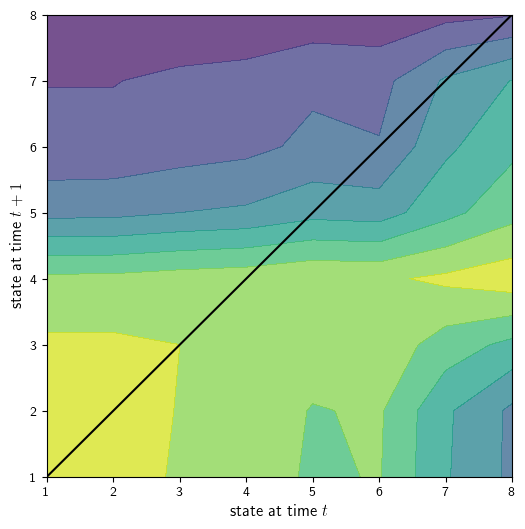

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
plot_matrices(P_B.transpose(), codes_B, ax, alpha=0.75, 
                 colormap=cm.viridis, color45d='black',
                 xlabel='state at time $t$', ylabel='state at time $t+1$')

if export_figures:
    plt.savefig("figures/markov_matrix_visualization.pdf")
plt.show()

### Wealth percentile over time

Here we compare the mixing of the transition matrix for intergenerational
social mobility $P_B$ and the transition matrix for international growth
dynamics $P_Q$. 

We begin by creating `quantecon` `MarkovChain` objects with each of our transition
matrices.

In [7]:
mc_B = qe.MarkovChain(P_B, state_values=range(1, 9))
mc_Q = qe.MarkovChain(P_Q, state_values=range(1, 6))

Next we define a function to plot simulations of Markov chains. 

Two simulations will be run for each `MarkovChain`, one starting at the
minimum initial value and one at the maximum.

In [8]:
def sim_fig(ax, mc, T=100, seed=14, title=None):
    X1 = mc.simulate(T, init=1, random_state=seed)
    X2 = mc.simulate(T, init=max(mc.state_values), random_state=seed+1)
    ax.plot(X1)
    ax.plot(X2)
    ax.set_xlabel("time")
    ax.set_ylabel("state")
    ax.set_title(title, fontsize=12)

Finally, we produce the figure.

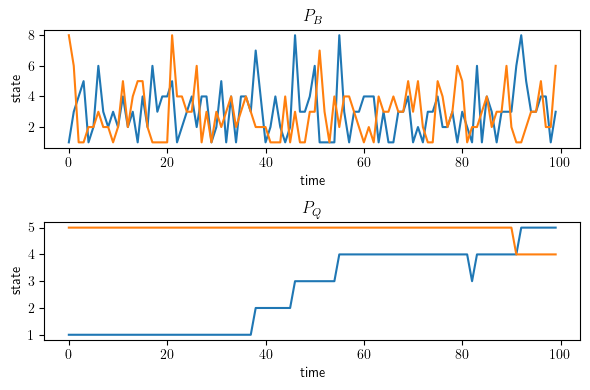

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))
ax = axes[0]
sim_fig(axes[0], mc_B, title="$P_B$")
sim_fig(axes[1], mc_Q, title="$P_Q$")
axes[1].set_yticks((1, 2, 3, 4, 5))

plt.tight_layout()
if export_figures:
    plt.savefig("figures/benhabib_mobility_mixing.pdf")
plt.show()

### Predicted vs realized cross-country income distributions for 2019

Here we load a `pandas` `DataFrame` of GDP per capita data for countries compared to the global average.

In [10]:
gdppc_df = ch4_data['gdppc_df']
gdppc_df.head()

gdppc       gdppc_w   gdppc_r
country year                                      
Aruba   2019  31096.205074  11334.843093  2.743417
        2018  30082.127645  11288.884262  2.664756
        2017  28440.051964  10731.655471  2.650109
        2016  27441.529662  10188.260065  2.693446
        2015  27458.225331  10142.143479  2.707339

Now we assign countries bins, as per Quah (1993).

In [11]:
q = [0, 0.25, 0.5, 1.0, 2.0, np.inf]
l = [0, 1, 2, 3, 4]

x = pd.cut(gdppc_df.gdppc_r, bins=q, labels=l)
gdppc_df['interval'] = x

gdppc_df = gdppc_df.reset_index()
gdppc_df['interval'] = gdppc_df['interval'].astype(float)
gdppc_df['year'] = gdppc_df['year'].astype(float)

Here we define a function for calculating the cross-country income
distributions for a given date range.

In [26]:
def gdp_dist_estimate(df, l, yr=(1960, 2019)):
    Y = np.zeros(len(l))
    for i in l:
        Y[i] = df[
            (df['interval'] == i) & 
            (df['year'] <= yr[1]) & 
            (df['year'] >= yr[0])
            ].count().iloc[0]
    
    return Y / Y.sum()

We calculate the true distribution for 1985.

In [27]:
ψ_1985 = gdp_dist_estimate(gdppc_df,l,yr=(1985, 1985))

Now we use the transition matrix to update the 1985 distribution $t = 2019 - 1985 = 34$
times to get our predicted 2019 distribution.

In [28]:
ψ_2019_predicted = ψ_1985 @ np.linalg.matrix_power(P_Q, 2019-1985)

Now, calculate the true 2019 distribution.

In [29]:
ψ_2019 = gdp_dist_estimate(gdppc_df,l,yr=(2019, 2019))

Finally we produce the plot.

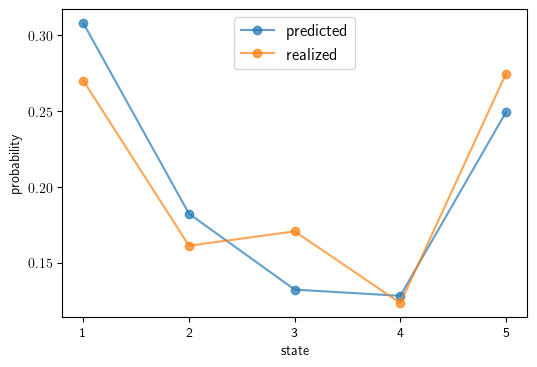

In [30]:
states = np.arange(0, 5)
ticks = range(5)
codes_S = ('1', '2', '3', '4', '5')

fig, ax = plt.subplots(figsize=(6, 4))
width = 0.4
ax.plot(states, ψ_2019_predicted, '-o', alpha=0.7, label='predicted')
ax.plot(states, ψ_2019, '-o', alpha=0.7, label='realized')
ax.set_xlabel("state")
ax.set_ylabel("probability")
ax.set_yticks((0.15, 0.2, 0.25, 0.3))
ax.set_xticks(ticks)
ax.set_xticklabels(codes_S)

ax.legend(loc='upper center', fontsize=12)
if export_figures:
    plt.savefig("figures/quah_gdppc_prediction.pdf")
plt.show()


### Distribution dynamics

Here we define a function for plotting the convergence of marginal
distributions $\psi$ under a transition matrix $P$ on the unit simplex.

In [31]:
def convergence_plot(ψ, P, n=14, angle=50):

    ax = qbn_plt.unit_simplex(angle)

    # Convergence plot
    
    P = np.array(P)

    ψ = ψ        # Initial condition

    x_vals, y_vals, z_vals = [], [], []
    for t in range(n):
        x_vals.append(ψ[0])
        y_vals.append(ψ[1])
        z_vals.append(ψ[2])
        ψ = ψ @ P

    ax.scatter(x_vals, y_vals, z_vals, c='darkred', s=80, alpha=0.7, depthshade=False)

    mc = qe.MarkovChain(P)
    ψ_star = mc.stationary_distributions[0]
    ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=80)

    return ψ


Now we define P.

In [32]:
P = (
    (0.9, 0.1, 0.0),
    (0.4, 0.4, 0.2),
    (0.1, 0.1, 0.8)
    )

#### A trajectory from $\psi_0 = (0, 0, 1)$

Here we see the sequence of marginals appears to converge.

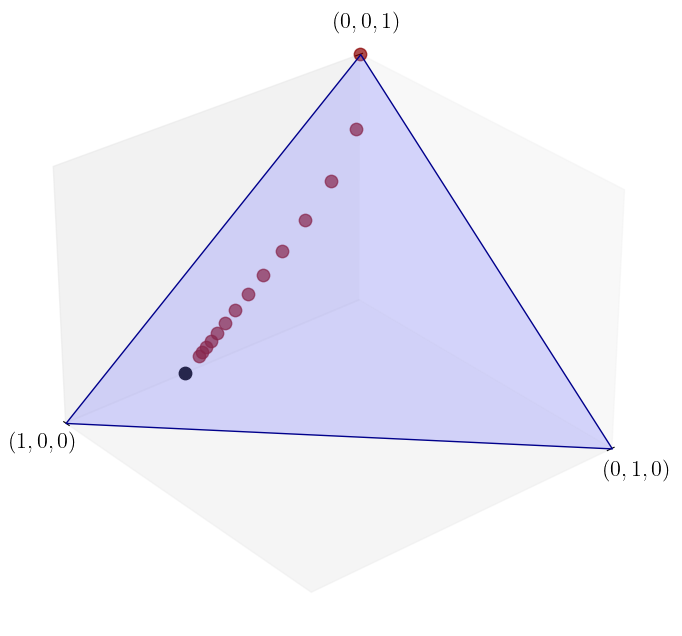

In [33]:
ψ_0 = (0, 0, 1)
ψ = convergence_plot(ψ_0, P)
if export_figures:
    plt.savefig("figures/simplex_2.pdf")
plt.show()

#### A trajectory from $\psi_0 = (0, 1/2, 1/2)$

Here we see again that the sequence of marginals appears to converge, and the
limit appears not to depend on the initial distribution.

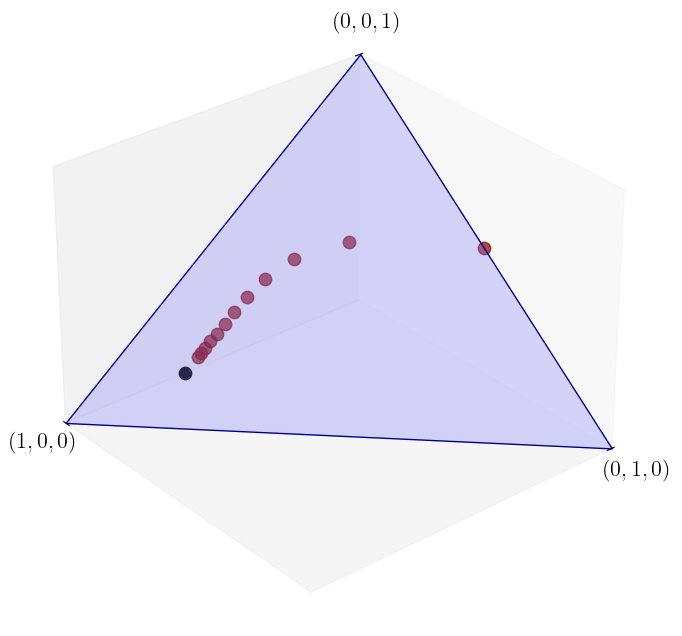

In [34]:
ψ_0 = (0, 1/2, 1/2)
ψ = convergence_plot(ψ_0, P, n=12)
if export_figures:
    plt.savefig("figures/simplex_3.pdf")
plt.show()

### Distribution projections from $P_B$

Here we define a function for plotting $\psi$ after $n$ iterations of the
transition matrix $P$. The distribution $\psi_0$ is taken as the uniform 
distribution over the
state space.

In [35]:
def transition(P, n, ax=None):
    
    P = np.array(P)
    nstates = P.shape[1]
    s0 = np.ones(8) * 1/nstates
    s = s0
    
    for i in range(n):
        s = s @ P
        
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot(range(1, nstates+1), s, '-o', alpha=0.6)
    ax.set(ylim=(0, 0.25), 
           xticks=((1, nstates)))
    ax.set_title(f"$t = {n}$")
    
    return ax

We now generate the marginal distributions after 0, 1, 2, and 100 iterations for $P_B$.

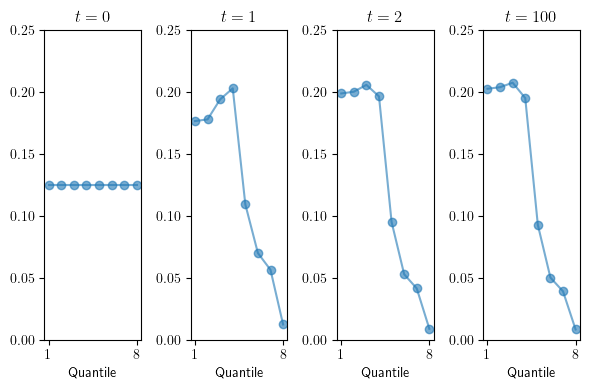

In [36]:
ns = (0, 1, 2, 100)
fig, axes = plt.subplots(1, len(ns), figsize=(6, 4))

for n, ax in zip(ns, axes):
    ax = transition(P_B, n, ax=ax)
    ax.set_xlabel("Quantile")

plt.tight_layout()
if export_figures:
    plt.savefig("figures/benhabib_mobility_dists.pdf")
plt.show()

## Asymptotics

### Convergence of the empirical distribution to $\psi^*$

We begin by creating a `MarkovChain` object, taking $P_B$ as the transition matrix.

In [37]:
mc = qe.MarkovChain(P_B)

Next we use the `quantecon` package to calculate the true stationary distribution.

In [38]:
stationary = mc.stationary_distributions[0]
n = len(mc.P)

Now we define a function to simulate the Markov chain.

In [39]:
def simulate_distribution(mc, T=100):
    # Simulate path 
    n = len(mc.P)
    path = mc.simulate_indices(ts_length=T, random_state=1)
    distribution = np.empty(n)
    for i in range(n):
        distribution[i] = np.mean(path==i)
    return distribution


We run simulations of length 10, 100, 1,000 and 10,000.

In [40]:
lengths = [10, 100, 1_000, 10_000]
dists = []

for t in lengths:
    dists.append(simulate_distribution(mc, t))

Now we produce the plots. 

We see that the simulated distribution starts to approach the true stationary distribution.

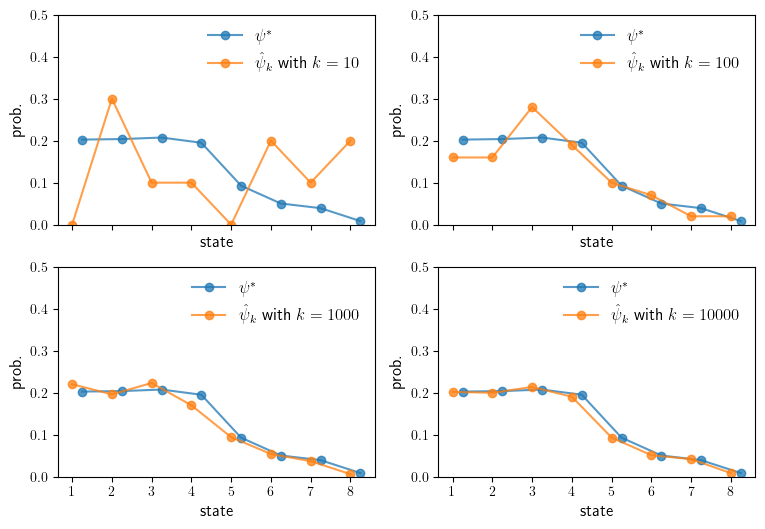

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6), sharex='all')#, sharey='all')

axes = axes.flatten()

for dist, ax, t in zip(dists, axes, lengths):
    
    ax.plot(np.arange(n)+1 + .25, 
           stationary, 
            '-o',
           #width = 0.25, 
           label='$\\psi^*$', 
           alpha=0.75)
    
    ax.plot(np.arange(n)+1, 
           dist, 
            '-o',
           #width = 0.25, 
           label=f'$\\hat \\psi_k$ with $k={t}$', 
           alpha=0.75)


    ax.set_xlabel("state", fontsize=12)
    ax.set_ylabel("prob.", fontsize=12)
    ax.set_xticks(np.arange(n)+1)
    ax.legend(loc='upper right', fontsize=12, frameon=False)
    ax.set_ylim(0, 0.5)
    
if export_figures:
    plt.savefig("figures/benhabib_ergodicity_1.pdf")
plt.show()